In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xbbg import blp
from IPython.core.display import display, HTML
import mplfinance as mpf 
import multitasking
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import xlwings as xlw
import statsmodels.tsa.stattools as ts 
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.vector_ar.vecm import coint_johansen

start_date = 1514768400000 # 1 January 2018, 00:00:00
end_date = 1527811199000   # 31 May 2018, 23:59:59
assets = ['BTCUSD', 'ETHUSD', 'LTCUSD', 'XMRUSD', 'NEOUSD', 'XRPUSD', 'ZECUSD']

crypto_prices = pd.DataFrame()

for a in assets:
    print('Downloading ' + a)
    crypto_prices[a] = get_bitfinex_asset(asset = a, ts_ms_start = start_date, ts_ms_end = end_date)

crypto_prices.head()

# Normalize prices by first value
norm_prices = crypto_prices.divide(crypto_prices.iloc[0])

plt.figure(figsize = (15, 10))
plt.plot(norm_prices)
plt.xlabel('days')
plt.title('Performance of cryptocurrencies')
plt.legend(assets)
plt.show()

for a1 in crypto_prices.columns:
    for a2 in crypto_prices.columns:
        if a1 != a2:
            test_result = ts.coint(crypto_prices[a1], crypto_prices[a2])
            print(a1 + ' and ' + a2 + ': p-value = ' + str(test_result[1]))

In [82]:
stoncks = pd.read_excel('Stonks.xlsx')
stoncks = stoncks[123] + ' RX Equity'
stoncks =stoncks.drop([6,16,26,28,29,30,32,33,36,37,39,41,42,44,46,47,49,50])
stoncks = stoncks.iloc[0:34]

df = pd.DataFrame()

for i in stoncks:
    data = blp.bdh(
        tickers=i, flds=['Open', 'High', 'Low', 'last_price'],
        start_date='2020', Per='D', Fill='P', Days='A',
    )
    name = data.columns[0][0]
    data = data[data.columns[0][0]].rename({'last_price':'Close'}, axis=1)
    data.index = data.index.rename('timestamp')
    data[name] = data['Close']
    df[name] = data[name]

In [83]:
stoncks = stoncks.iloc[0:34]

In [148]:
df = pd.DataFrame()

for i in stoncks:
    data = blp.bdh(
        tickers=i, flds=['Open', 'High', 'Low', 'last_price'],
        start_date='2020', Per='D', Fill='P', Days='A',
    )
    name = data.columns[0][0]
    data = data[data.columns[0][0]].rename({'last_price':'Close'}, axis=1)
    data.index = data.index.rename('timestamp')
    data[name] = data['Close']
    df[name] = data[name]

In [149]:
for i in df.columns:
    df[i] = (df[i] - df[i].min())/(df[i].max() - df[i].min())

<AxesSubplot:xlabel='timestamp'>

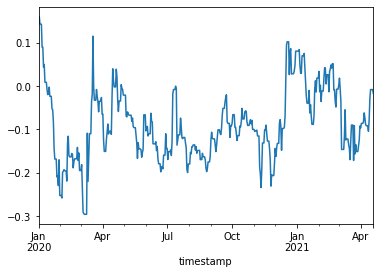

In [157]:
(df['GAZP RX Equity'] - df['LKOH RX Equity']).plot()

<AxesSubplot:xlabel='timestamp'>

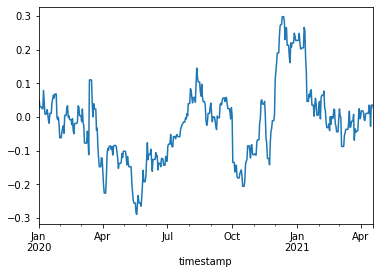

In [156]:
(df['SBER RX Equity'] - df['ROSN RX Equity']).plot()

In [183]:
df

,SBER RX Equity,GAZP RX Equity,POGR RX Equity,YNDX RX Equity,LKOH RX Equity,MAIL RX Equity,SBERP RX Equity,PLZL RX Equity,TATN RX Equity,GMKN RX Equity,...,TATNP RX Equity,AFLT RX Equity,FIVE RX Equity,OZON RX Equity,MAGN RX Equity,IRAO RX Equity,RTKM RX Equity,SNGSP RX Equity,FLOT RX Equity,FEES RX Equity
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.673079,0.975172,NaN,0.126690,0.815052,NaN,0.589072,0.000000,0.842022,0.286282,...,0.894417,0.742410,0.332995,NaN,0.266756,0.371552,0.307166,0.492398,NaN,0.601535
2020-01-02,0.673079,0.975172,NaN,0.126690,0.815052,NaN,0.589072,0.000000,0.842022,0.286282,...,0.894417,0.742410,0.332995,NaN,0.266756,0.371552,0.307166,0.492398,NaN,0.601535
2020-01-03,0.675169,1.000000,NaN,0.122863,0.857239,NaN,0.572190,0.015885,0.880225,0.313782,...,0.894417,0.739957,0.330285,NaN,0.282708,0.393103,0.317647,0.531633,NaN,0.672281
2020-01-04,0.675169,1.000000,NaN,0.122863,0.857239,NaN,0.572190,0.015885,0.880225,0.313782,...,0.894417,0.739957,0.330285,NaN,0.282708,0.393103,0.317647,0.531633,NaN,0.672281
2020-01-05,0.675169,1.000000,NaN,0.122863,0.857239,NaN,0.572190,0.015885,0.880225,0.313782,...,0.894417,0.739957,0.330285,NaN,0.282708,0.393103,0.317647,0.531633,NaN,0.672281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,0.910764,0.775497,0.248411,0.752743,0.783496,0.128729,0.948112,0.684641,0.450562,0.766492,...,0.451699,0.158234,0.507453,0.834174,0.902949,0.327371,0.933904,0.985287,0.146510,0.700543
2021-04-16,0.959773,0.771008,0.291739,0.763205,0.779109,0.106354,1.000000,0.688645,0.443596,0.794786,...,0.445146,0.164673,0.510840,0.895413,0.978284,0.340302,0.929626,0.973516,0.097443,0.710649
2021-04-17,0.959773,0.771008,0.291739,0.763205,0.779109,0.106354,1.000000,0.688645,0.443596,0.794786,...,0.445146,0.164673,0.510840,0.895413,0.978284,0.340302,0.929626,0.973516,0.097443,0.710649


In [194]:
ts.coint(df['MAIL RX Equity'], df['SBER RX Equity'])

C:\Users\PZAPOLSKY\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1573: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(


(-inf, 0.0, array([-3.9196945 , -3.34905087, -3.05340979]))

In [197]:
df['SBER RX Equity'].dropna().loc[df['MAIL RX Equity'].dropna().index[0]::]

timestamp
2020-07-02    0.295475
2020-07-03    0.299490
2020-07-04    0.299490
2020-07-05    0.299490
2020-07-06    0.338546
                ...   
2021-04-15    0.910764
2021-04-16    0.959773
2021-04-17    0.959773
2021-04-18    0.959773
2021-04-19    0.942795
Name: SBER RX Equity, Length: 292, dtype: float64

In [191]:
df['MAIL RX Equity'].dropna().shape[0]

292

In [199]:
first_name = []
second_name = []
p_value = []
for a1 in df.columns:
    for a2 in df.columns:
        if a1 != a2:
            if df[a2].dropna().shape[0] > df[a1].dropna().shape[0]:
                test_result = ts.coint(df[a1].dropna(), df[a2].dropna().loc[df[a1].dropna().index[0]::])
            else:
                test_result = ts.coint(df[a2].dropna(), df[a1].dropna().loc[df[a2].dropna().index[0]::])
            first_name.append(a1)
            second_name.append(a2)
            p_value.append(test_result[1])

In [200]:
stats = pd.DataFrame({'first':first_name, 'second':second_name, 'p-value':p_value})

In [201]:
stats.sort_values(by='p-value')

,first,second,p-value
914,OZON RX Equity,AFKS RX Equity,0.000047
785,AFKS RX Equity,OZON RX Equity,0.000047
959,IRAO RX Equity,POGR RX Equity,0.000894
94,POGR RX Equity,IRAO RX Equity,0.000894
133,LKOH RX Equity,GAZP RX Equity,0.001562
...,...,...,...
291,TATN RX Equity,MAGN RX Equity,1.000000
978,IRAO RX Equity,NLMK RX Equity,1.000000
546,VTBR RX Equity,CHMF RX Equity,1.000000
548,VTBR RX Equity,NLMK RX Equity,1.000000


<AxesSubplot:xlabel='timestamp'>

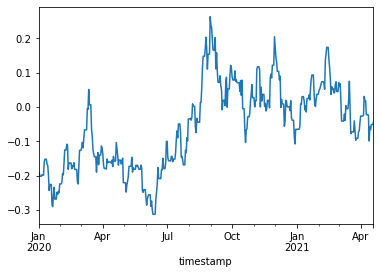

In [218]:
(df['YNDX RX Equity'] - df['MGNT RX Equity']).plot()

In [207]:
wb = xlw.Book()
sht = wb.sheets['Sheet1']

In [208]:
sht = wb.sheets['Sheet1']

In [211]:
sht.range('A1').value = stats